# 1.     Data Exploration and Preparation (15 points):

·       Load the Iris dataset and examine its structure.

·       Explore the dataset by calculating summary statistics and visualizing the data using appropriate plots (e.g., histograms, scatter plots).

·       Split the dataset into training (80%) and testing sets (20%).

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

#loading Data
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [12]:
#Exploring dataset
df.shape
df.describe

<bound method NDFrame.describe of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1

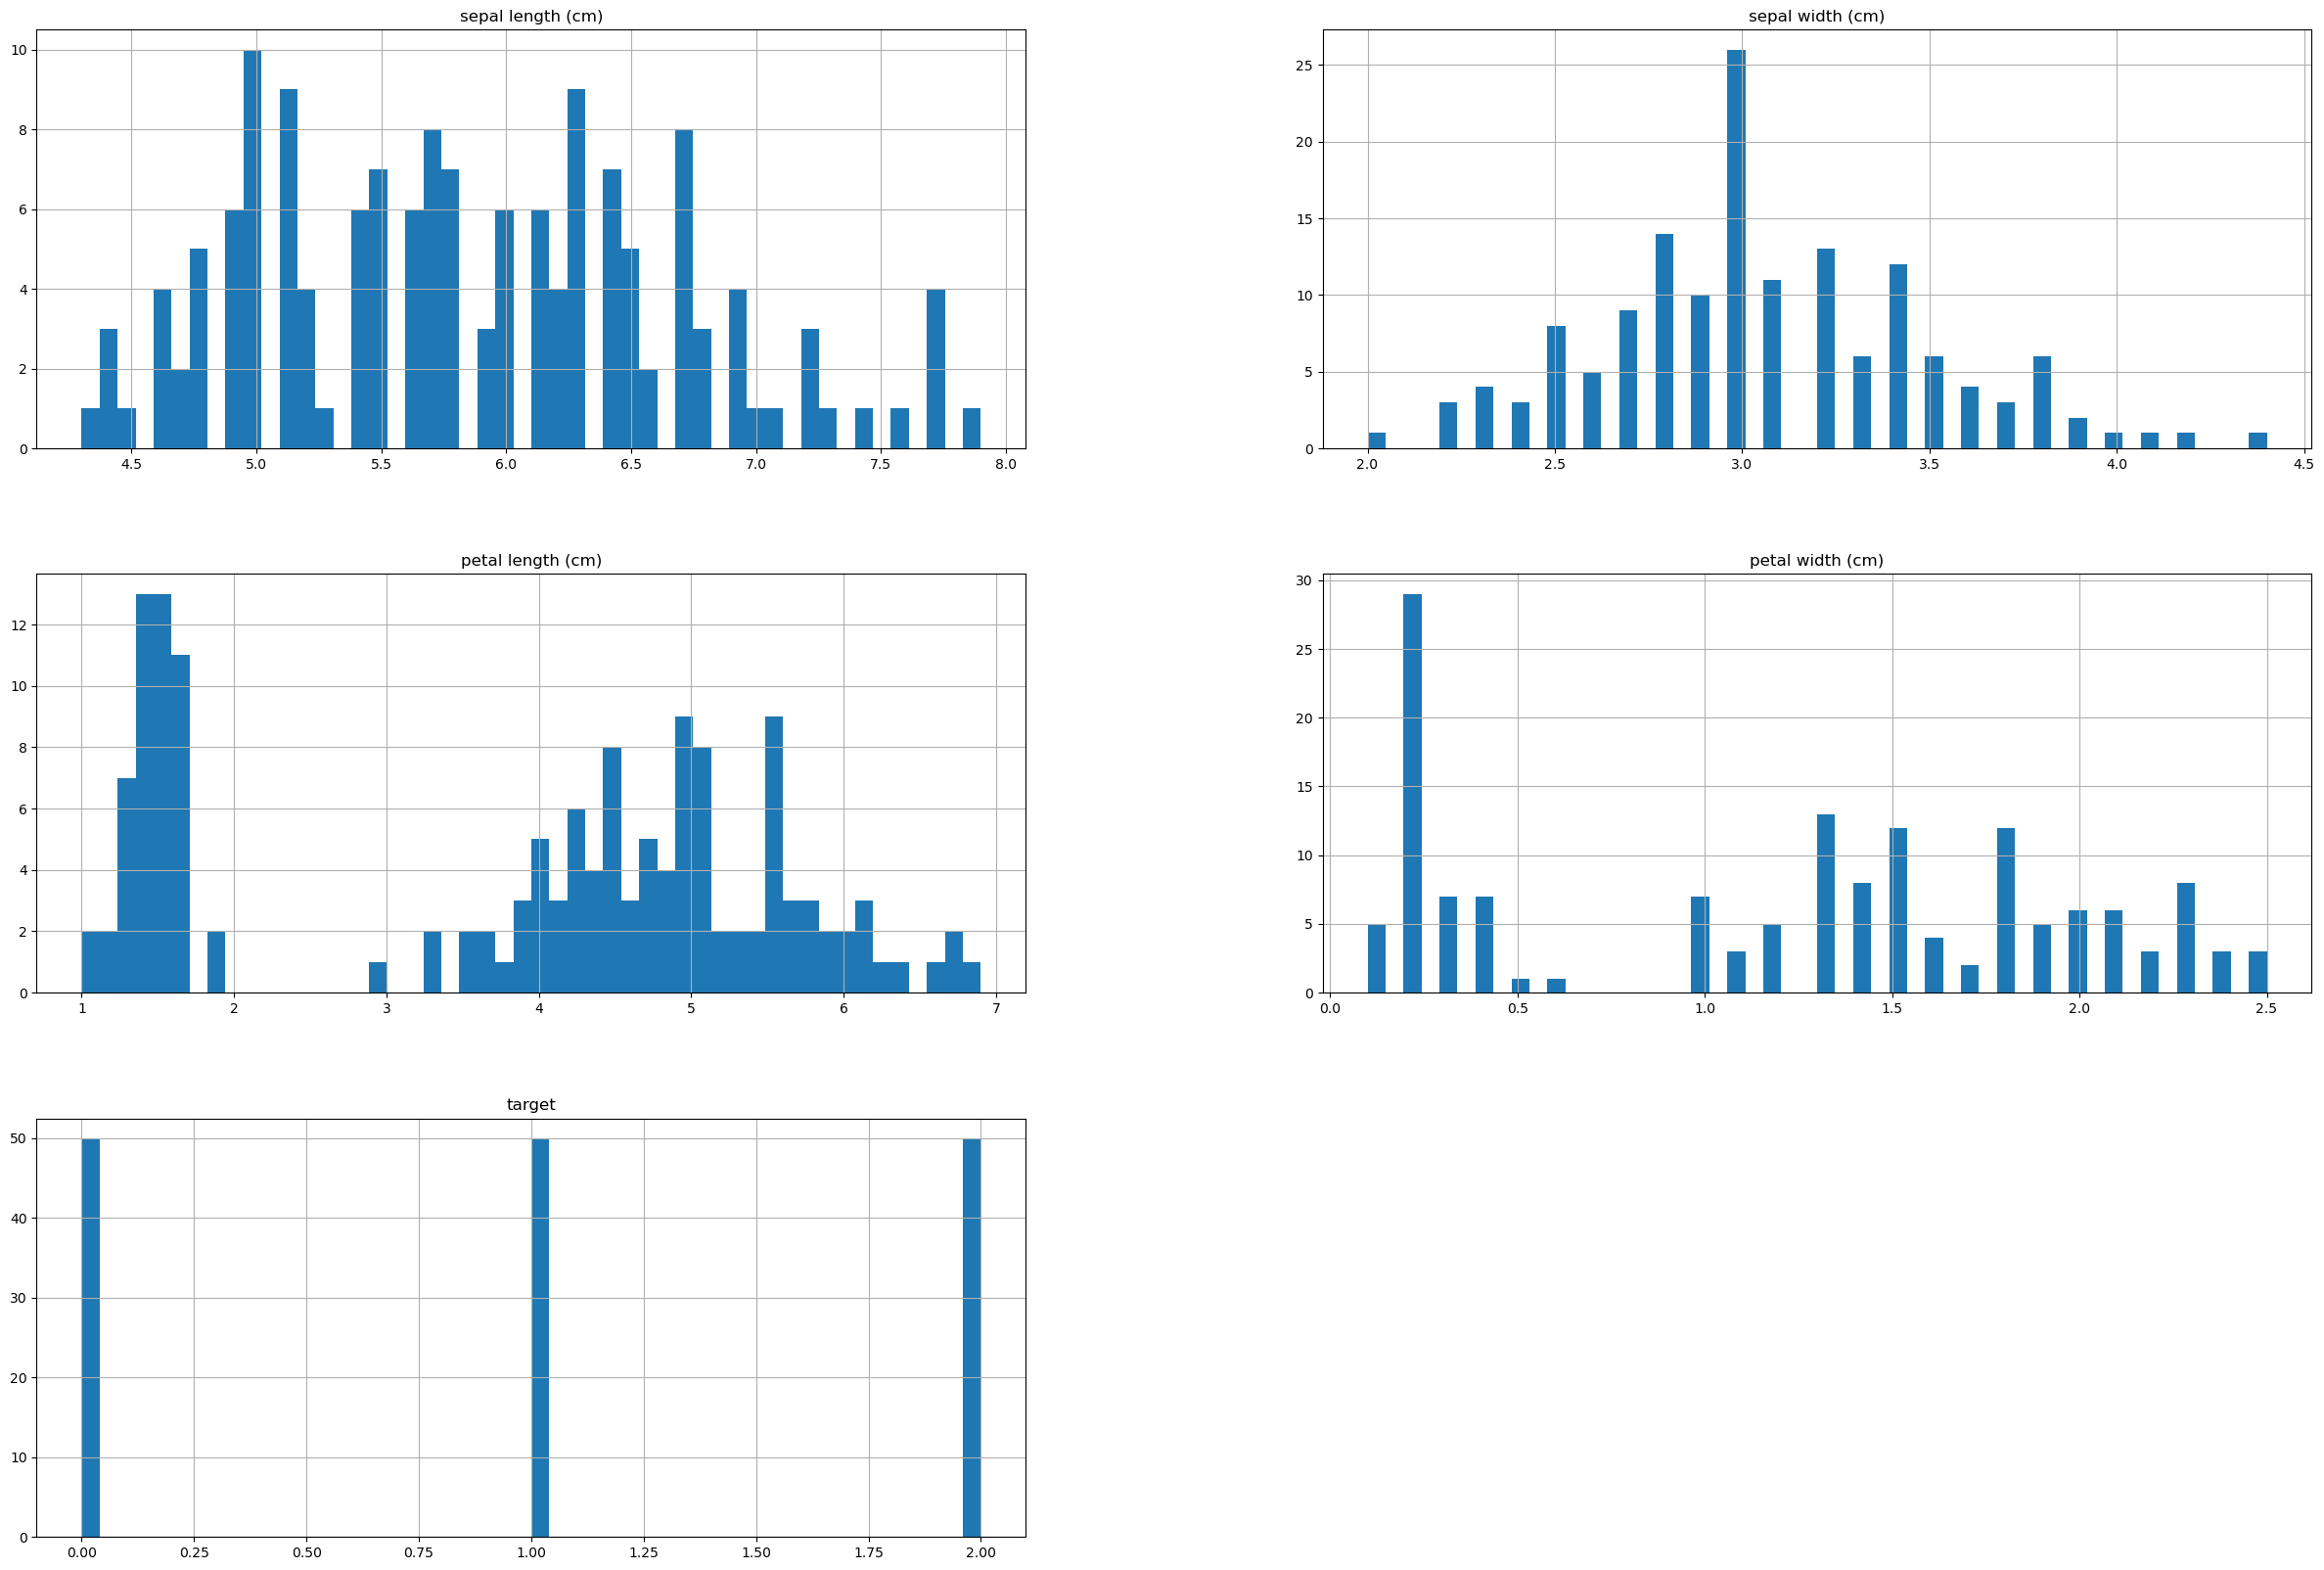

In [13]:

df.hist(bins=50, figsize=(30,20))
plt.show()

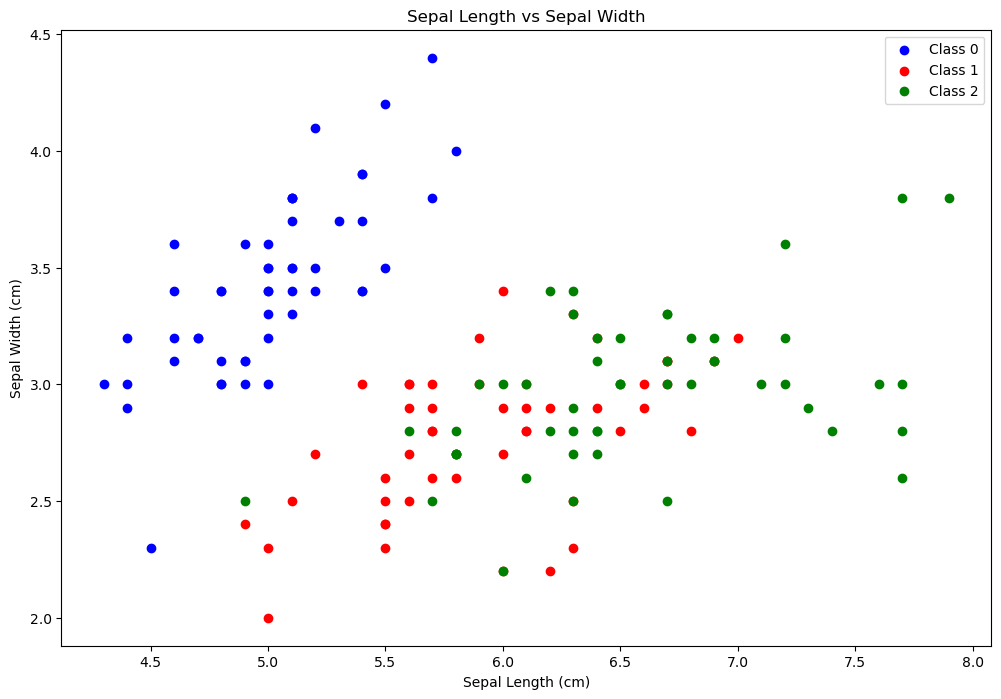

In [14]:
plt.figure(figsize=(12, 8))

# Define a list of colors for the different classes
colors = ['b', 'r', 'g']

# Define the class labels
classes = df['target'].unique()

# Create scatter plots for each pair of features
for i in range(len(classes)):
    class_data = df[df['target'] == classes[i]]
    plt.scatter(class_data['sepal length (cm)'], class_data['sepal width (cm)'], c=colors[i], label=f'Class {classes[i]}')

# Set labels and title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [15]:
#splitting the dataset into testing and training sets
X_train, X_test, Y_train, Y_test = train_test_split(df[data.feature_names], df['target'], test_size=0.2, random_state=0)

We can clearly see that the classes have a correlation with the sepal with and length.

We can also see that sepal length and width are left skewed.


# 2.     Decision Tree Implementation (30 points):

·       Implement a decision tree classifier using scikit-learn's DecisionTreeClassifier class.

·       Train the decision tree classifier on the training data.

·       Set and tune hyperparameters like the maximum depth of the tree, minimum samples per leaf, or other relevant parameters.

In [16]:
#Train the decision tree on the training data
#Hyperparameter Tuning
tree_classifier_tuned = DecisionTreeClassifier(max_depth=3, min_samples_leaf=4, random_state=0)
tree_classifier_tuned.fit(X_train, Y_train)
y_pred_tuned = tree_classifier_tuned.predict(X_test)
accuracy_tuned = accuracy_score(Y_test, y_pred_tuned)
print(f'Tuned Accuracy: {accuracy_tuned:.2f}')

#Predict on the test data
Y_pred = tree_classifier_tuned.predict(X_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Default Accuracy: {accuracy:.2f}')

Tuned Accuracy: 1.00
Default Accuracy: 1.00


Here we can see the effect of tuning on the accuracy of the Model, in this case the default accuracy was at 100% so there were no improvements to be made, however we can still experiment as seen to tweak the accuracy


# 3.     Model Evaluation (20 points):

·       Use the trained classifier to predict the species of iris flowers in the testing dataset.

·       Evaluate the model's performance using appropriate classification metrics such as accuracy, precision, recall, F1-score, etc.

In [17]:
#The training was done in section 2. on line 6 with the following code:
#Y_pred = tree_classifier.predict(X_test)

#Evaluating the Model Performance
#Re-Evaluate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

#Evaluate precision
precision = precision_score(Y_test, Y_pred, average='weighted')
print(f'Precision: {precision:.2f}')

#Evaluate recall
recall = recall_score(Y_test, Y_pred, average='weighted')
print(f'Recall: {recall:.2f}')

#Evaluate F1-score
f1 = f1_score(Y_test, Y_pred, average='weighted')
print(f'F1 Score: {f1:.2f}')

#Generate a full classification report
class_report = classification_report(Y_test, Y_pred, target_names=data.target_names)
print(f'Classification Report:\n{class_report}')


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




# 4.     Visualization (15 points):

·       Visualize the decision tree structure that you've built, showing how it makes decisions based on the features.

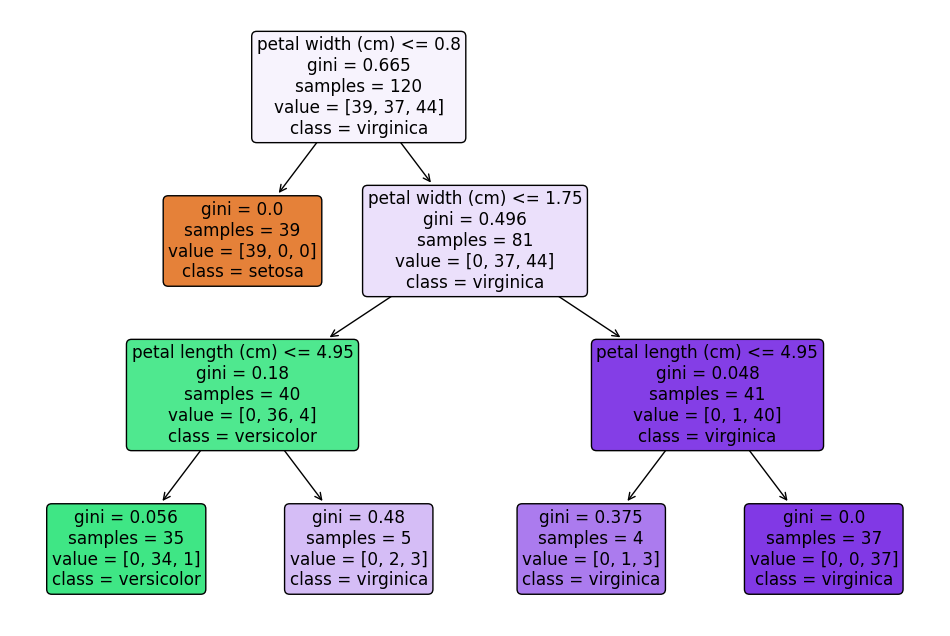

In [18]:
#Visualize the decision tree

#Converting to list so that plot_tree accepts the set
class_names = data.target_names.tolist()

#Creating the chart
plt.figure(figsize=(12, 8))
plot_tree(tree_classifier_tuned, feature_names=data.feature_names, class_names=class_names, filled=True, rounded=True)
plt.show()


# 5.     Discussion and Conclusion (20 points):

·       Summarize the key findings from your analysis, including the model's performance and the structure of the decision tree.

In conclusion my model performs exceptionally well, with 100% Accuracy, Recall, Percision and F1 score.

My decision tree has a max depth of 3 and a min leaf count of 4. For all of my random states I used 0.

I would also like to notice how the use of classes and libraries makes this process extremely streamlined and easy.